##### explore notebook--eda and transform
***

# Importing Libraries and Data

In [20]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reopening our cleaned dataframe

In [21]:
pd.set_option('display.max_columns', 999) # setting to view all columns

with open('data/data_b.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_b = pickle.load(f)
display(data_b.shape)
data_b.head()

(21061, 52)

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Full_baths_.5,Full_baths_1,Full_baths_2,Full_baths_3,Full_baths_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014,221900.0,1180,5650,0,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014,538000.0,2570,7242,0,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015,180000.0,770,10000,0,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014,604000.0,1960,5000,0,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015,510000.0,1680,8080,0,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Dataframe successfully imported from `pickle`.
***

# Questions

It's time to think about what we want to find out from this dataset. I am interested in learning the following:
1. Which variables show the strongest correlations with price?
2. Which variables (whether redundant or un - influential) can or should be eliminated toward building a predictive model for home price?
3. Can we make a reasonably compelling model without categorical data?
4. Does model effectiveness vary across zip codes?

# EDA

Before getting too deliberate, let's step backfor a fresh look at our data.

## Creating a visual for all prices in the dataframe

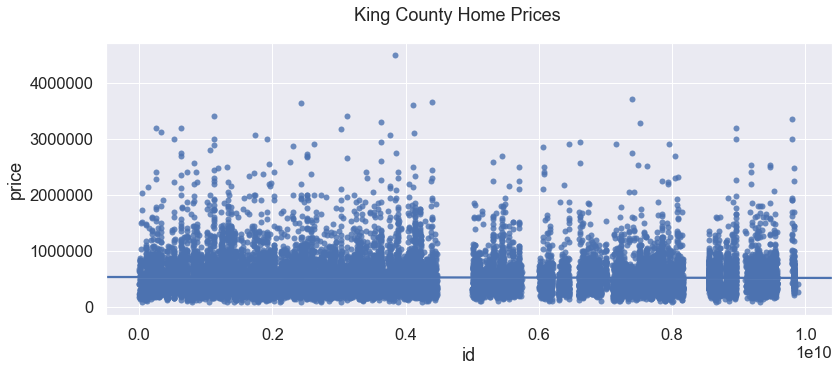

In [22]:
# create a figure
plt.figure(figsize=(13, 5)) # total figure size

# create a single subplot
plt.subplot(1,1,1)
sns.set(font_scale=1.05) # adjust for plot size

# plot correlation of price to itself with regression line
sns.regplot(x='id', y='price', data=data_b)
plt.suptitle("King County Home Prices", fontsize=18)

plt.show()

For the record, we are looking at thousands of homes, with most of their sale values close to .5 million and one lon.ely (though perhaps quite comfortable) well above 4 million

# Correlation with `price`

We are curious about what features are correlated with price, so let's look at a correlations table.

In [23]:
# viewing a kitchen sink of correlations
df_corr = data_b.corr()
df_corr

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Full_baths_.5,Full_baths_1,Full_baths_2,Full_baths_3,Full_baths_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,1.000000,-0.013862,-0.004477,-0.131639,-0.000540,-0.006875,0.025791,-0.000619,0.022597,0.001292,-0.142124,-0.014498,0.006325,-0.017521,0.018926,-0.003289,-0.008642,-0.022591,0.028336,-0.002907,-0.023325,-0.026106,-0.003409,0.030798,-0.000071,-0.004554,-0.007883,-0.012389,0.002613,0.015782,-0.014636,0.019657,0.001373,-0.012457,0.032210,-0.025711,-0.011126,-0.005194,-0.003052,-0.027691,-0.016497,-0.018337,0.042379,0.008569,-0.011770,-0.015291,-0.010772,0.005477
price,-0.013862,1.000000,0.671091,0.084155,0.569847,0.285744,0.045874,0.335745,0.024552,0.591469,0.077410,-0.062150,-0.148331,-0.171820,0.211434,0.166625,-0.043251,-0.319448,0.059391,0.383835,0.182158,-0.267092,0.030452,0.235837,0.094330,0.018770,-0.000629,-0.345715,0.098370,0.146867,0.182410,0.280407,-0.021171,-0.055542,0.000359,-0.027971,0.066216,-0.005627,-0.034844,-0.092131,-0.226646,-0.325982,0.031202,0.282902,0.365385,0.331311,0.234919,0.074080
sqft_living,-0.004477,0.671091,1.000000,0.160551,0.866220,0.392534,0.334394,0.044498,0.256926,0.763473,0.174608,-0.131724,-0.365564,-0.253975,0.402955,0.288770,-0.078880,-0.546372,0.247904,0.445791,0.184331,-0.378163,-0.053401,0.431801,0.077281,-0.065702,-0.009434,-0.243721,0.067934,0.126572,0.145109,0.136914,-0.036828,-0.065699,0.103091,-0.085246,-0.016703,-0.012379,-0.057522,-0.134904,-0.327688,-0.360956,0.099844,0.358631,0.379983,0.306969,0.173563,0.058958
sqft_lot,-0.131639,0.084155,0.160551,1.000000,0.170350,0.006126,0.048341,-0.088248,0.226007,0.140812,0.709223,0.002950,-0.025981,-0.010322,0.024804,0.007924,0.001906,-0.041737,-0.003417,0.063722,0.037973,-0.007378,0.015903,0.013510,0.006328,-0.046935,-0.005595,-0.061977,-0.007490,0.032239,0.072918,0.014688,0.007099,0.040159,-0.013767,0.014198,-0.012991,-0.000312,0.000691,0.024550,-0.018117,-0.063724,-0.020903,0.052223,0.075194,0.065991,0.043495,0.000851
sqft_above,-0.000540,0.569847,0.866220,0.170350,1.000000,-0.111604,0.441380,-0.011490,0.362263,0.733418,0.183676,-0.115675,-0.323147,-0.206121,0.372783,0.189286,-0.069998,-0.522902,0.271001,0.372412,0.164585,-0.553485,-0.048998,0.593551,0.084780,-0.021255,-0.004174,-0.124362,0.020063,0.065641,0.079439,0.076622,-0.030432,-0.057911,0.198923,-0.145592,-0.091268,-0.010942,-0.049822,-0.112734,-0.289167,-0.388833,0.083273,0.379232,0.384589,0.306811,0.164021,0.059360
sqft_basement,-0.006875,0.285744,0.392534,0.006126,-0.111604,1.000000,-0.142636,0.108569,-0.151307,0.170817,0.008299,-0.048731,-0.132540,-0.124509,0.117301,0.220099,-0.027742,-0.123773,-0.004252,0.197368,0.065814,0.260903,-0.017325,-0.227239,-0.002087,-0.091054,-0.010942,-0.251073,0.098236,0.124771,0.140185,0.132848,-0.016991,-0.024802,-0.155533,0.095027,0.130674,-0.004467,-0.022592,-0.060271,-0.118714,-0.004015,0.044895,0.016283,0.048339,0.047899,0.045014,0.008511
yr_built,0.025791,0.045874,0.334394,0.048341,0.441380,-0.142636,1.000000,-0.149216,0.408554,0.327104,0.066714,-0.094137,-0.205836,0.027096,0.128704,0.018766,-0.055561,-0.491576,0.369430,0.184798,0.044501,-0.362022,-0.380957,0.529634,-0.007263,0.199253,0.019706,0.071140,-0.034869,-0.047780,-0.024838,-0.027242,-0.049060,-0.067074,0.389808,-0.255451,-0.244334,-0.011977,-0.042402,-0.129500,-0.317083,-0.210386,0.209411,0.226381,0.144134,0.094112,0.036258,0.003550
lat,-0.000619,0.335745,0.044498,-0.088248,-0.011490,0.108569,-0.149216,1.000000,-0.134955,0.046285,-0.090373,0.006363,0.081560,-0.053439,-0.018541,0.027907,-0.007798,0.018156,-0.058378,0.063578,0.022108,-0.028458,0.068026,-0.054715,0.013540,0.121293,0.010118,-0.006818,0.016652,0.00510

A problem with one - hot encoding is that it can complicate analysis. One example is the inability to determine whether `price` increases with the number of `bedrooms` when bedroom counts are spread - out over 4 separate columns.

Fortunately, we can acces our dataframe as it was preserved prior to one - hot encoding and explore relationships for the grouped categories.

In [24]:
with open('data/data_f_no_hots.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    no_hots_df = pickle.load(f)

display(no_hots_df.shape)
no_hots_df.head()

(21061, 21)

,id,date,price,bedrooms,Full_baths,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,2014,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0


### Viewing correlation data in plots

This should be easier to look at:

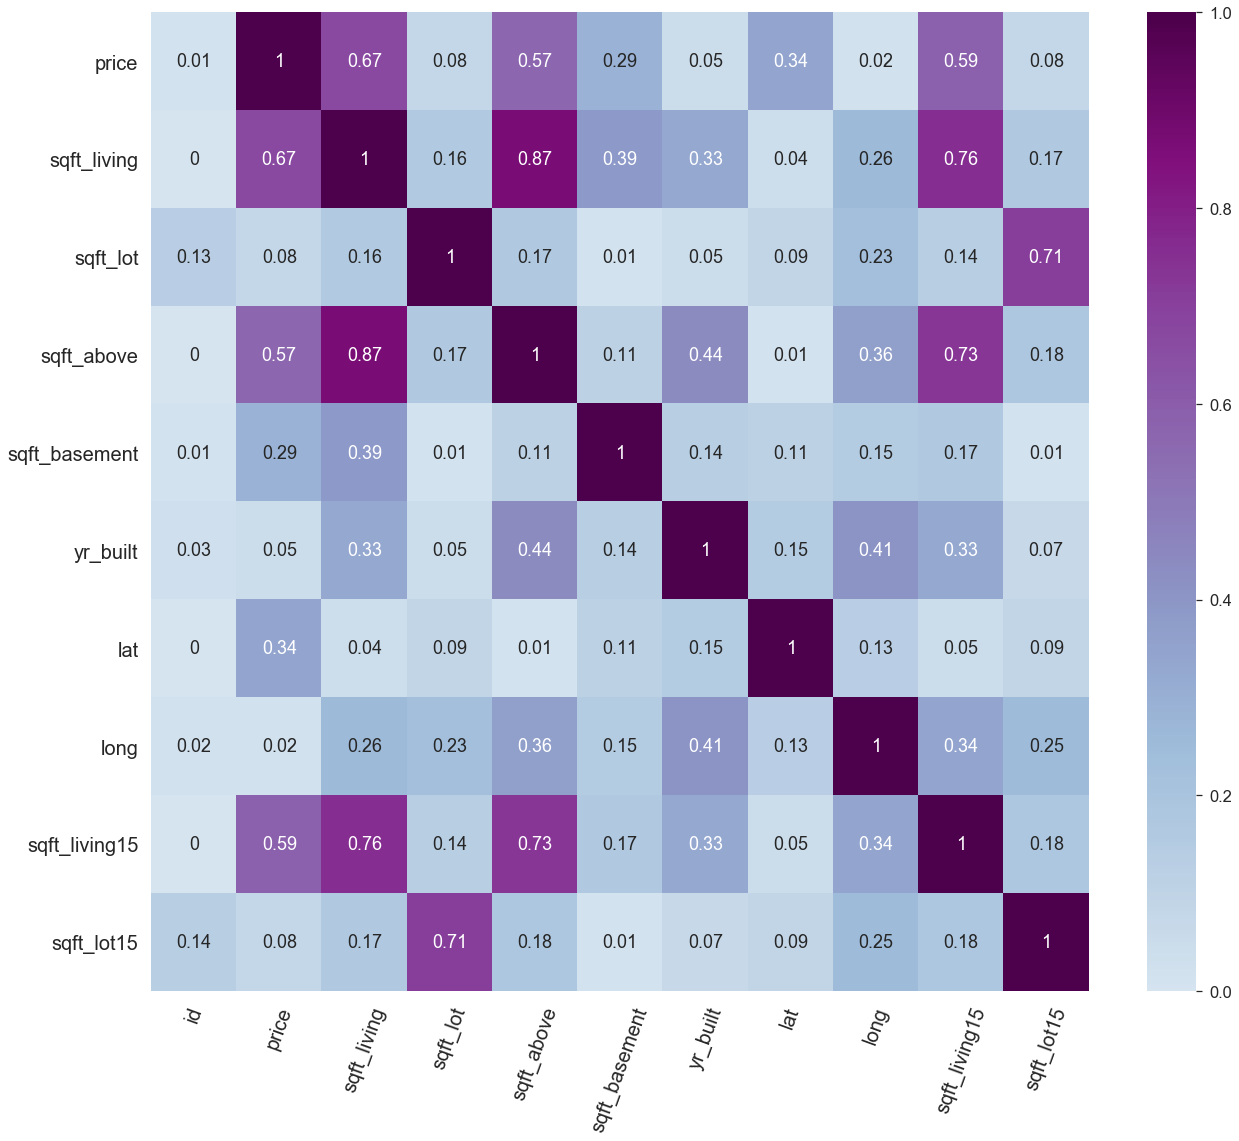

In [25]:
# create the correlations table
nh_corr = no_hots_df.drop('date', axis=1).corr()

# create a function to generate a heatmap
def plot_corr_heatmap(cor, cmap="BuPu"):
    # creating a figure to plot a heatmap from `no_hots_df` correlations
    plt.figure(figsize=(21,18))
    sns.set(font_scale=1.5, color_codes=True) # making annotations legible
    # plotting
    sns.heatmap(cor.round(2).drop(['id']).abs(), center=.4, annot=True, cmap="BuPu")
    plt.xticks(rotation = 70, fontsize=20)
    plt.yticks(fontsize=20)
    plt.autoscale()
    plt.show()

plot_corr_heatmap(nh_corr)

## Answer 1
### Strongest correlations
> Darker colors in the `price` column or row, starting with blue correlations above 0.3 are worth noting:
* The leaders are: `sqft_living` (.67), `sqft_living15` (.59), and `sqft_above`(.57).
    * Square feet features are strong, out of the gate. Multicollinearity can be expected, however, for the three noted above.
* `yr_built` is unpursuasive, while `sqft_lot` and `sqft_lot15` barely make a dent.

## Answer 2.1
### Eliminations

> The feature `yr_built` is irredeemable; `sqft_lot15` is unimpressive and redundant with `sqft_lot`.

In [26]:
# remove the `yr_built` and `sqft_lot15` columns
no_hots_df.drop(['yr_built', 'sqft_lot15'], axis=1, inplace=True)

In [27]:
# view info
no_hots_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'Full_baths', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'Renovated'],
      dtype='object')

### Data Distributions

Lets view each variable on its own.

#### Histograms

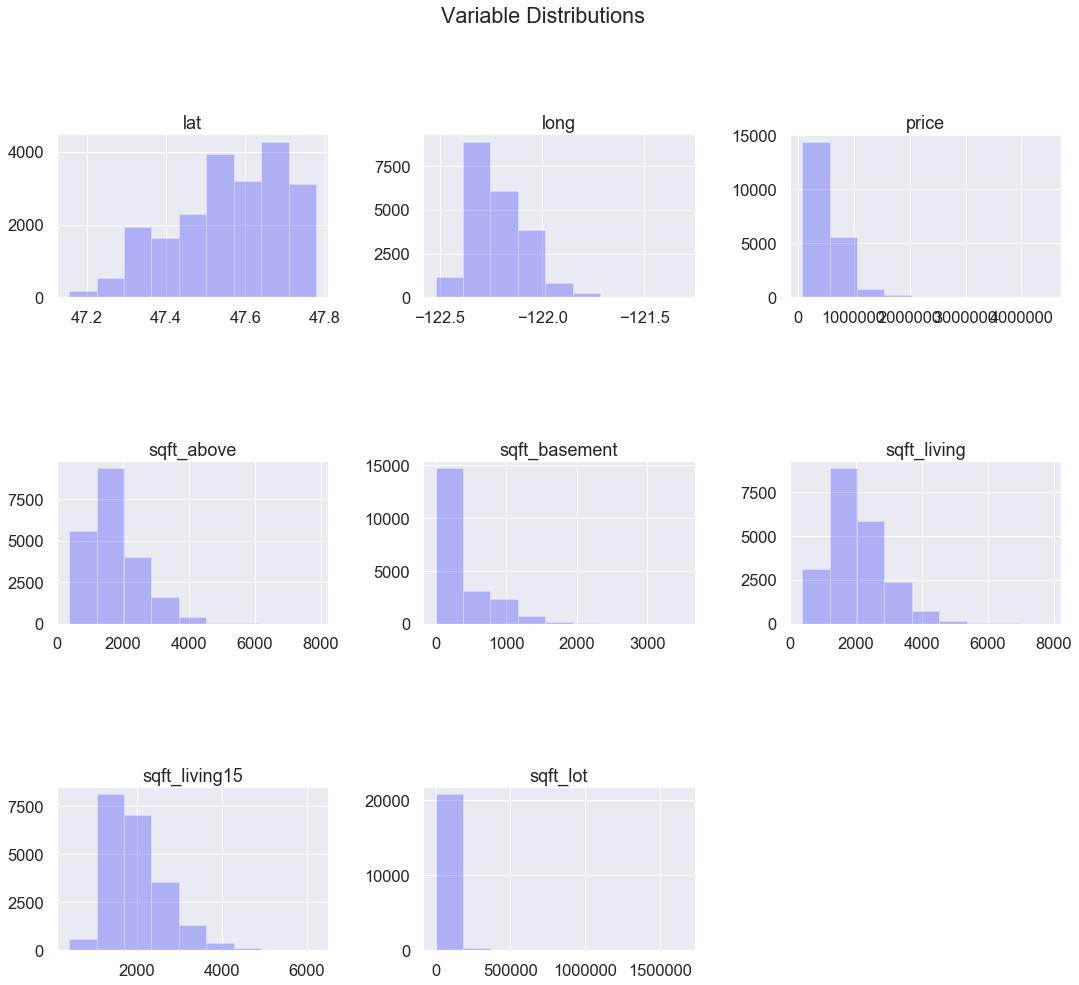

In [28]:
# selecting plot styling
plt.style.use('seaborn')
sns.set(font_scale=1.5)  # making labels legible

# plotting select columns in matplotlib without kde
no_hots_df.hist(figsize=(18, 15), bins=9,
            column=[col for col in no_hots_df.drop(['id'], axis=1).columns],
            alpha=.25, color='blue')  # Plot specific columns

plt.subplots_adjust(wspace=.35, hspace=1)
plt.suptitle('Variable Distributions', va='bottom')
plt.show()

* We can see `sqft` variables are positively skewed, but these are counts of unique values rather than binomial distribution residuals. At this point, we are still getting to know our data.
* `sqft_above`, `sqft_living`, and `sqft_living15` could almost be distortions of the same plot. We can anticipate the need to investigate and eliminate collinearity among predictor variables.

#### Viewing the same using iteratively generated distribution subplots with kde

In [ ]:
# select plot style
plt.style.use('seaborn')
sns.set(font_scale=1.5); # preventing overlap of long column names

# selecting columns excluding `id`
columns = no_hots_df.drop(['id', sqft_living, sqft_lot, sqft_above, sqft_basement, zipcode, Renovated], axis=1).columns

# setting a figure and number of axes to plot
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(15, 21))
plt.subplots_adjust(wspace=.55, hspace=.75) # space between subplots
plt.title("Data Distributions")

plt.xticks(rotation = 30, fontsize=15)
plt.yticks(fontsize=15)

# flattening the list of axes and enumerating to associate each
# axis with the dataframe column in the same index position
for index, a in enumerate(ax.flatten()):
    if index < 16: # avoid error of indexes exceeding axes
        column = columns[index]
        # plot in seaborn including kde
        a = sns.distplot(no_hots_df[column], ax=a)

plt.show()


> We can make a couple of observations:
* We have a number of collinear variables, but we can work through some of that feature selection with validation, while building (and folding) models.
* The eyball sees that we coud conservatively addres much skewness in half of the 'sqft variables' (`sqft_living`, `sqft_above`, and `sqft_living15`) by cropping their values at a maximum of about 4000.
    * Let's describe them.

## `sqft` Outliers

In [ ]:
# subset a dataframe of the three `sqft` columns from above
sqs = no_hots_df[[col for col in no_hots_df.columns if col.startswith(
    'sqft') and ('living' in col or 'above' in col)]]

# describe the subset
sqs.describe()

How many rows would be affected by dropping those with maximum values of 5000 or more for the columns in question?

In [ ]:
for col in sqs.columns:
    sqs_5000 = sqs[sqs[col] >= 5000]
    
sqs_5000.count()

That does not seem too expensive. How would dropping these rows affect the column distributions?

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
# sns.set(context='notebook', font_scale=1.35)

# give a little more space between the 'suptitle' and figugre
fig.suptitle("Distribution Comparison", y=1.02)
# and between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=5)

for col in sqs.columns:
    sns.distplot(sqs[col], ax=ax[0])
    ax[0].set_title('current')
    ax[0].set(xlabel='', yticklabels=[])
    
for col in sqs_5000.columns:
    sns.distplot(sqs_5000[col], ax=ax[1])
    ax[1].set_title('dropping values above 5000 sqft')
    ax[1].set(xlabel='', yticklabels=[])

plt.legend((sqs.columns[0], sqs.columns[1], sqs.columns[2]), fontsize='x-small')
plt.show()

It is interesting how the shapes of these distributions change with an adjustment the affects so few entries. We will move forward with these adjustments, for now.

In [ ]:
# get the indexes for rows meeting the 'sqft' drop criteria
index_names = no_hots_df[(
    no_hots_df['sqft_living'] >= 5000) | (
    no_hots_df['sqft_above'] >= 5000) | (
    no_hots_df['sqft_living15'] >= 5000)].index

# delete these rows from the dataFrame
no_hots_df.drop(index_names , inplace=True)

In [ ]:
# how many rows does that leave us
no_hots_df.shape

## Answer 2.2

Here, we have not dropped complete columns, but we have dropped outlier entries to help make some of our `sqft` variables more normal and therefore more capable of being useful to a linear regression model.

## Skew

We can use tolls to examine kurtosis, as we begin modeling. As for skewness--and we know we still have plenty of it--we can check that, right now.

In [ ]:
for col in no_hots_df.columns:
        print (f"Skew in {col}:", no_hots_df[col].skew().round(3))

* The `sqft_lot` variables are off the rails.

We may have some log transformations, in our future.

***
### Assumptions for Linear Regression

- Linearity between target and predictor variables
    - Previewed above, but the scales may be a bit unbalanced, yet
- Normality of model residuals
    - Verify after building a baseline model
- Homoscedasticity: equal variability of a dependent variable across the values of an independent variable
    - Review after normalizing data
- Absence of, or minimal multicollinearity
    - We will need to select the best and discard the rest from multicollinear variables 

## Checking for Linearity

Let's see how independent variables relate to our target.

### Reviewing plots of predictor variables against the target


In [ ]:
# select plot style
plt.style.use('seaborn')
sns.set(font_scale=1.5); # preventing overlap of long column names

# selecting columns excluding `id`
columns = no_hots_df.drop(['id', 'date', 
                           'zipcode', 'lat', 
                           'long'], axis=1).columns

# setting a figure and number of axes to plot
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(15, 21))
plt.subplots_adjust(wspace=.55, hspace=.75) # space between subplots
plt.title("Predictor Linearity with Target")

plt.xticks(rotation = 30, fontsize=15)
plt.yticks(fontsize=15)

# flattening the list of axes and enumerating to associate each
# axis with the dataframe column in the same index position
for index, a in enumerate(ax.flatten()):
    if index < 14: # avoid error of indexes exceeding axes
        column = columns[index]
        # plot in seaborn including kde
        a = sns.regplot(data=no_hots_df, x=no_hots_df[column], y='price', ax=a)

plt.show()


We see many positive indicators among the variables. The regression line for `waterfront` against `price` looks almost as steep as the line for `grade`. Then again ...

In [ ]:
custom_palette = sns.color_palette("Dark2")
sns.pairplot(no_hots_df, x_vars=["bedrooms", "sqft_basement"], y_vars=["price"],
             hue="waterfront", palette=custom_palette, height=5, aspect=.8, kind="reg");

A spot on the waterfront comes at enough of a premium that it can significantly influence other variables.

In [ ]:
# how many waterfront properties
no_hots_df.loc[no_hots_df['waterfront'] == 1, ['id']].count()

There are only 108 properties on the waterfront, in this set of more than 20,000. Still, it has a significant effect on linear regression. One could argue that the entire category is an outlier. I think it is time to drop it.

* In addition, it looks like nearly every variable is correlated with price (`zipcode`, `date`, and `id` not counted as 'measures').
* We observe some linearity, and there are also many signs of heteroscedsticity, which would violate our assumptions for linear regression
* `Renovated`, `yr_built`, and `condition` look fairly weak as indicators. I am still interested in what the model may have to say about `Renovated`, but it is time to say farewell to `yr_built`, and `condition`.

#### Dropping `condition` , `waterfront`, and `yr_built`

In [ ]:
no_hots_df.drop(['condition', 'waterfront', 'yr_built'], axis=1, inplace=True)

no_hots_df.columns

## Answer 2.3

This time, we have dropped complete columns: one for its outsized influence and two others for their lack of correlation with the target as revealed via visual EDA.

## Pickle the current - state dataframe

Store the `no_hots_df` dataframe in a sub - directory of the repository as `no_hot_drops`.

In [ ]:
with open('data/no_hot_drops.pickle', 'wb') as f:
    # Pickling the 'no_hots_df' dataframe using the highest protocol available.
    pickle.dump(no_hots_df, f, pickle.HIGHEST_PROTOCOL)

### Continue to the next notebook



* Model and conclude

![encap graphic of ](images/endcap-n2.png)

# Notes
***

## Parking Lot

In [ ]:
# import gc
# gc.get_count()
# gc.collect()
# gc.get_count()

In [ ]:
* The variables `view`(.38) and `lat`(.35) are each in the next tier.
* The number of bathrooms has what might initially seem to be a surprising edge over bedrooms, but I suppose that is to be expected in homes with larger living/ entertainment spaces.
* On the other hand, renovations appear to have surprisingly low influence over price. Again, there may be simple explanations for that. Even before taking data normalization into consideration, I can imagine a fair number of homeowners renovating just to catch - up with the housing market.